In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
matplotlib.rc('figure', figsize=(18, 10))

# Setup

For this lab I chose the LHC dataset, in order to make a fake background we need to use the function scipy.stats.poisson.rvs. and as instructed we need to make sure the mean of the distribution is 100.

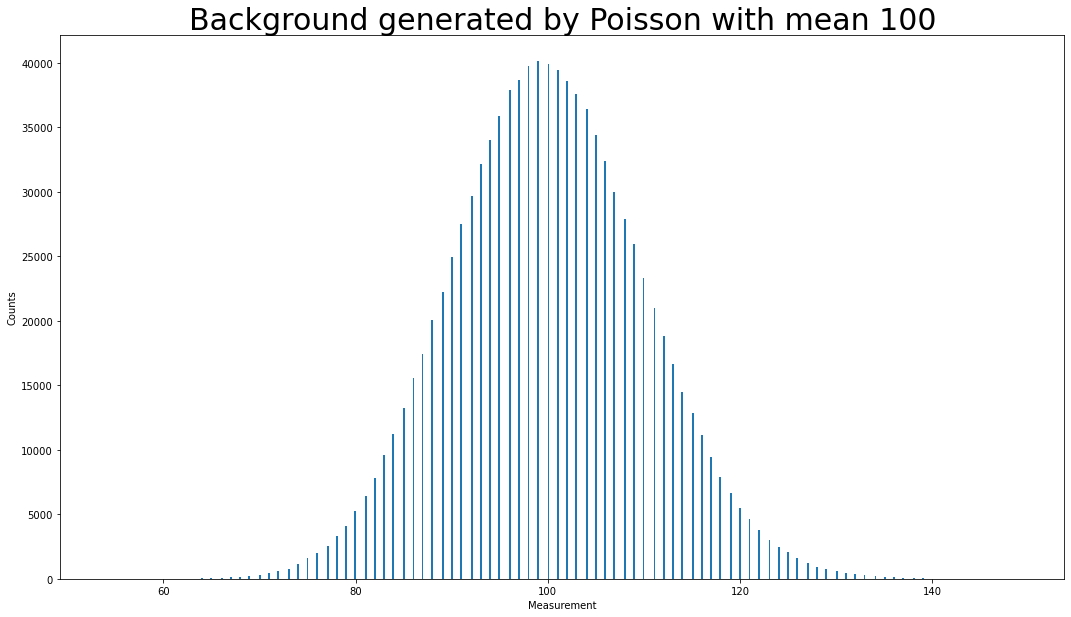

In [37]:
background = stats.poisson.rvs(100,size=1000000)
plt.hist(r,bins=500)
plt.title("Background generated by Poisson with mean 100", fontsize = '30')
plt.ylabel("Counts")
plt.xlabel("Measurement")
plt.show()

# Problem 1
The first problem is to look at your background distribution and determine where the 5𝜎 sensitivity threshold is. [Hint, you've done this several times now, look back at the first few labs.]

This should be relatively easy since we have been finding 5$\sigma$ for a long time

In [38]:
sigma = stats.norm.cdf(5)   
fiveSigma = stats.poisson.ppf(sigma,100)
print("The threshold value is: ", fiveSigma)

The threshold value is:  154.0


# Problem 2

Now inject a signal of known strength. You will want to make your signal moderately strong, say somewhere in the 8-30𝜎 range. Inject this signal into your background data many times.

a) Histogram how bright the observed signal appears to be, and discuss it's shape. Say in words what this histogram is telling you.

Injecting a signal in the 8 - 30$\sigma$ range. This new distribution will also be a possion distribution because this signal also counts particle events. We first pick a number within that range.

In [39]:
prob_8sigma = stats.norm.sf(8)
threshold = stats.poisson.isf(prob_8sigma, 100)
print('The 8 sigma value of this distribution is {}'.format(threshold))

The 8 sigma value of this distribution is 190.0


In [40]:
prob_7sigma = stats.norm.sf(7)
threshold = stats.poisson.isf(prob_7sigma, 100)
print('The 7 sigma value of this distribution is {}'.format(threshold))

The 7 sigma value of this distribution is 178.0


if we choose any number large than 8, the machine will automatically round it to inf, but studying the pattern of changing the sigma values, we could know that 200 is in range.

We will pick 200 since it's for sure within the range of 8 - 30$\sigma$ range

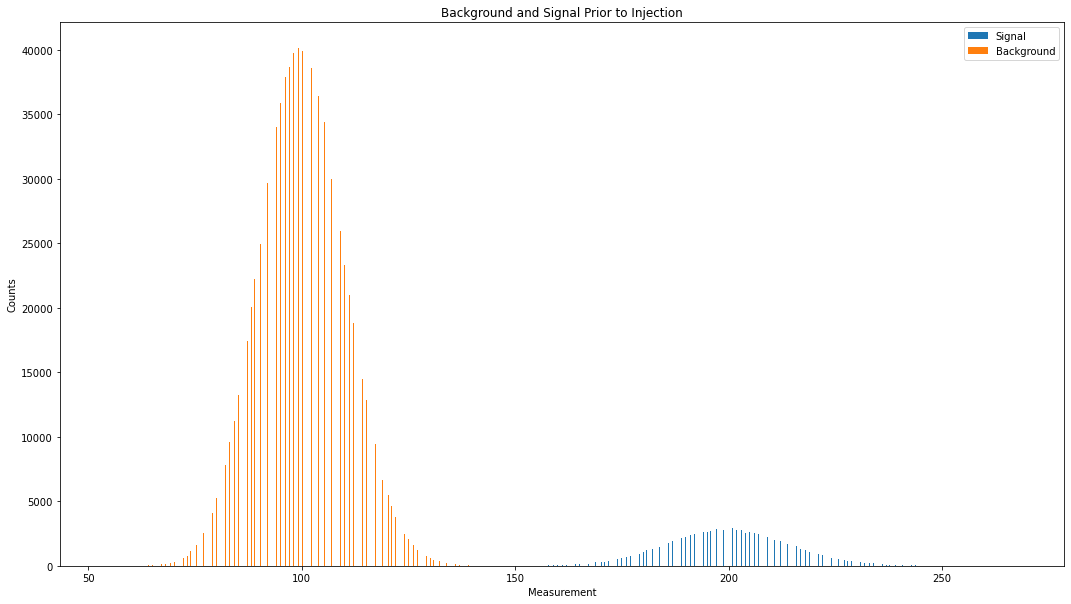

In [41]:
signal_mean = 200
signal = stats.poisson.rvs(signal_mean,size=100000)
plt.hist([signal, r], bins = 500,label=['Signal', 'Background'])
plt.title("Background and Signal Prior to Injection")
plt.xlabel("Measurement")
plt.ylabel("Counts")
plt.legend()
plt.show()

We can confirm that the distribution we just produced has a mean of 200 from the above graph, and we don't see any clear overlap between these two graphs, now we try to combine them and see what happens.

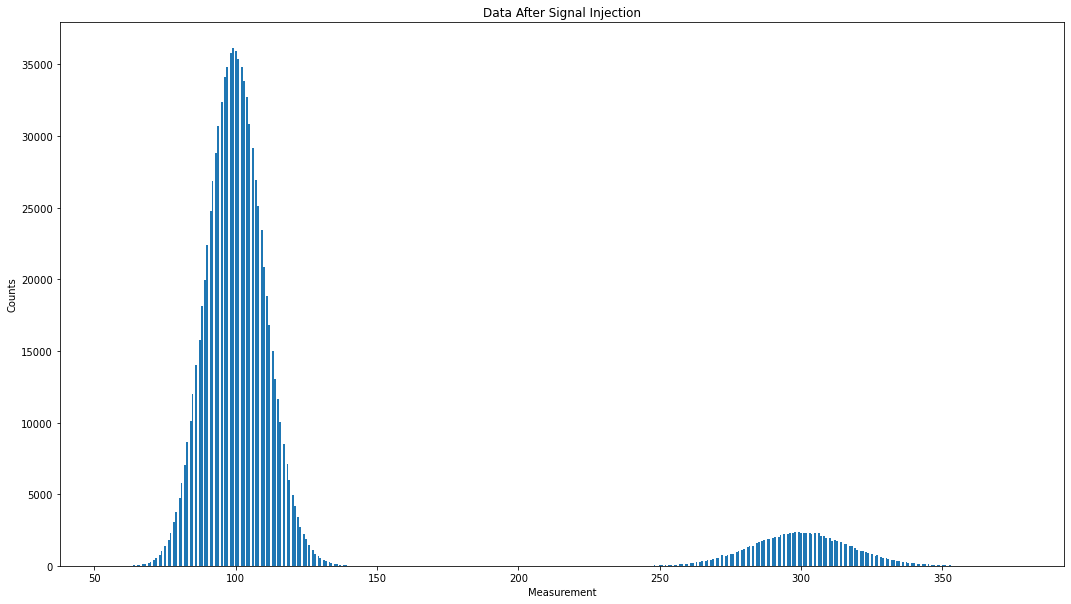

In [42]:
mixed = np.zeros(r.size)
for i in range(mixed.size):
    if i < signal.size:
        mixed[i] = np.add(r[i], signal[i])
    else:
        mixed[i] = r[i]
plt.hist(mixed,bins = 500)
plt.title('Data After Signal Injection')
plt.xlabel('Measurement')
plt.ylabel('Counts')
plt.show()

We see that the mean has moved from 200 to 300, which is exactly the original mean added to the second distribution mean. This is not suprising because if we think about it, a event on average produce a mean of 200, and the background on average produces a mean of 100, if the signal is happening with the background at the same time we basically add them up,the sum of the particles from the background plus the particles from the signal, which comes to 100 + 200 = 300. Therefore it makes sense that the average moved 100 to the right. Also the overall shape of the distribution remains poisson because when you add two poisson distribution together the outcome is remains poisson.The net effect of all of this is that the observed measurement is not a measurement of the signal, but a measurement of the signal plus background, so that the observed value is more likely to be stronger than the true injected signal. Even though it's a poisson distribution, due to the central limit theorem, the signal looks gaussian. 

# Problem 3

Now make a suite of injected signals. You will want to have a range of injected signal strengths, starting at zero and extending well above 5𝜎 (30𝜎 or more). You will want to follow the work you did for Homework 5 very closely.

a) Clearly state what you are simulating, and make a 2D histogram of injected signal vs. observed data



The below graph shows the relationship for the probability of occurrence of any injected signal given an observed signal. And the strongest relationship can be observed along the diagonal of the graph, where the color is most yellow-ish. By observing the graph we can tell the offset between injected signal and observed signal is around 100, which is the mean of the background poisson distribution.

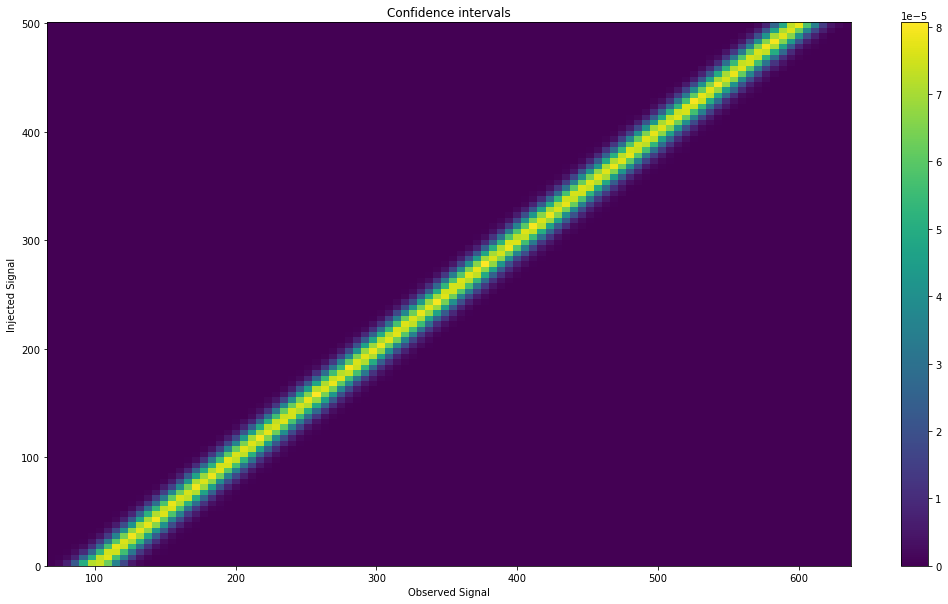

In [63]:
inj = np.linspace(0,501,1000000)

observed = background + inj
graph = plt.hist2d(observed, inj, bins = (100,100), density=True)

plt.colorbar(graph[3])
plt.title("Confidence intervals")
plt.ylabel("Injected Signal")
plt.xlabel("Observed Signal")
plt.show()


b) For the same injected signal power as in problem 2, show that you get the same answer.

To check that we get the same answer, we sample from the background many times and add to each sampled value the mean of the signal we had in previous steps, which is 200.

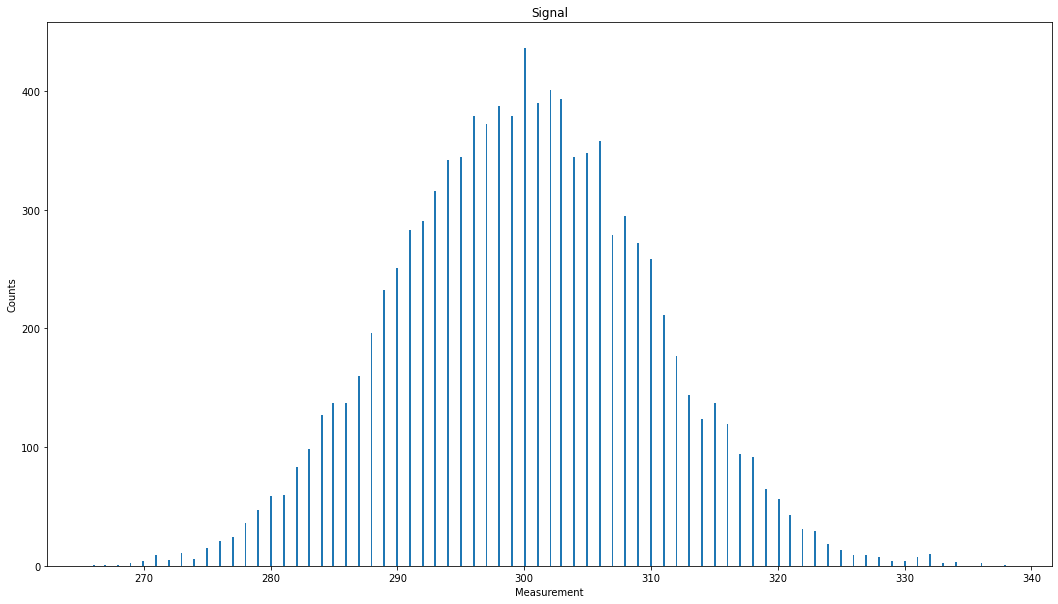

In [65]:
a1 = stats.poisson.rvs(100, size = 10000)
b1 = np.array([])
signal = 200
for i in a1:
    b1 = np.append(b1, i + signal)
    
plt.hist(b1, bins = 500)
plt.title('Signal')
plt.xlabel('Measurement')
plt.ylabel('Counts')
plt.show()

We see a poisson distribution with mean of 300, which is consistent with the result we got earlier, it seems like a gaussian distribution but we can see from the peak it's not exactly symmetric, so we know it stays poisson.

c) Now reverse the problem, select an observed data value (pick something quite a bit stronger than 5𝜎) and create a 1D histogram of the true signal probability given the observed data. Describe the meaning of this histogram.

We will pick the observed data value to be 350 because that's significantly stronger than 5 sigma.

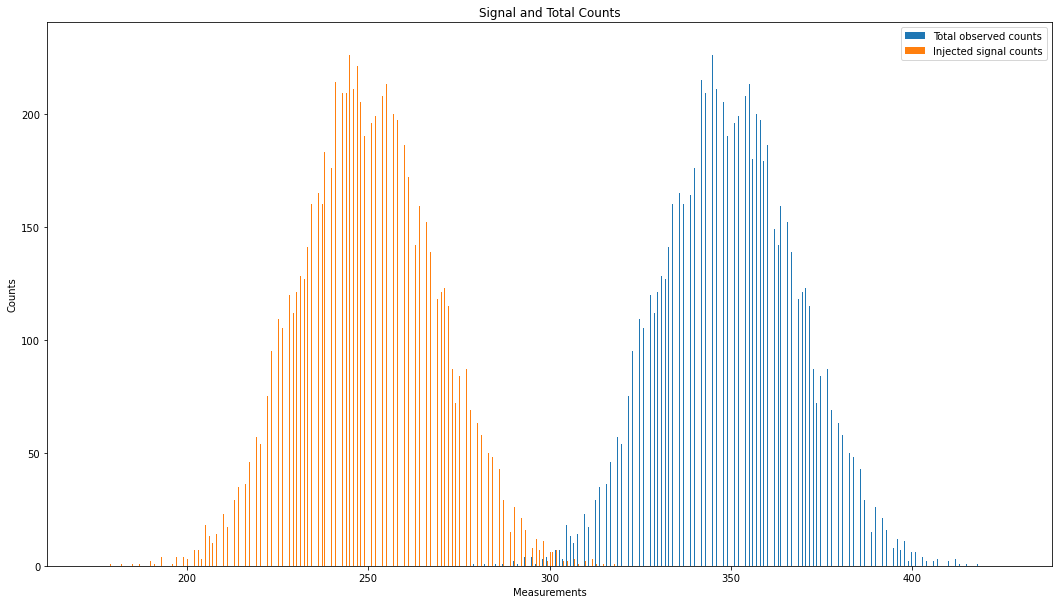

In [64]:
targetMean = 350
backgroundMean = 100
newSample = stats.poisson.rvs(targetMean, size=10000)
al = np.array([])
for i in newSample:
    al = np.append(al, i - backgroundMean)
    
plt.hist([newSample, al], bins = 500, label=['Total observed counts', 'Injected signal counts'])
plt.title('Signal and Total Counts')
plt.xlabel('Measurements')
plt.ylabel('Counts')
plt.legend()
plt.show()

From the graph we confirm that these distributions look like previous ones. And clearly the injected signal is independent of the background.

d) For your observed signal, what is the 1𝜎 uncertainty on the true signal strength?

e) Discuss the answer to part d in some depth. Is it symmetric? Is it biased? Does this make sense?

We will start by getting the pdf of 1 sigma, and then integrate it from the mean to the 1 sigma probability from both sides. In out graph the center of the distribution was 250

In [71]:
samp = stats.norm.cdf(1)
N = a1.size
r = 1
p = 0
while p < samp:
    p = 0
    for i in al:
        if (i <= r + 250) and (i >= -r + 250):
            p += (1 / N)
    r += 1
print('We integrated up to a distance of {} from the mean.'.format(r))

We integrated up to a distance of 27 from the mean.


I claim this range we integrated over gives the range of our 1 sigma uncertainty in the signal strength. To see this, observe that our sample is large enough to be practically representative of the true signal; the probability that the true signal give a data point outside of our range is practically zero. This is the assumption made when we normalize our data and claim it to be a distribution.

Furthermore, this means we are assuming the true signal mean will lie somewhere among these values. Then, the fraction of all values of the distribution contained within some range ought to give the probability that the true mean lies in the range. So, we integrate on the distribution until we hit a 1 sigma probability to get a range that we are 1 sigma certain will contain the true mean. Note we made the assumption (to ease calculations) that the true distribution is approximately symmetric in this case, which we know to be true here, as we are dealing with Poisson distributions. This allowed us to integrate symmetrically outwards on the distribution from the mean. 

We also were able to deduce the mean of this particular signal exactly from previous parts, but in general, we would need to calculate the exact mean. Integrating out from the mean may also not be symmetric in all cases, but as there is a possibility the true signal strength lies above or below the mean here, and we know the signal to be symmetric here, then we can integrate symmetrically outwards from our known mean.